# Digital Communications Simulations

The intent of this notebook is to have a modular simulation that can simulate every aspect of a digital communications system.

In [ ]:
# Libraries
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from digicomm import * # import my helper functions


## BER Example

The following takes the available constellations from `digicomm.py` and calculates the constellation BER in terms of Eb/N0 in an AWGN channel.

In [ ]:
# Parameters
c_types = constellations.keys()
ber_data = {}
nsyms = 30000 # the number of symbols to simulate for each SNR

for c_type in c_types: # for each constellation
    c = getConstellation(type=c_type) # get constellation to use as LUT
    M = len(c) # number of constellation points

    SNR = np.linspace(0,10,11) # SNRs to simulate
    BER = np.zeros(len(SNR))

    for i, snr in enumerate(SNR): # for each SNR
        # produce random bits
        nbits = nsyms * int(np.log2(M))
        bits = np.random.randint(0,2,size=(nbits,))
        syms = bitsToSymbols(bits,M)

        # transmission
        tx = c[syms]
        rx = addNoise(tx, SNR=snr, Eb=1/np.log2(len(c)))

        # make decisions
        rx_sym = makeDecisions(rx, c)
        rx_bits = symbolsToBits(rx_sym, M)

        # calculate BER
        be = np.count_nonzero(rx_bits - bits)
        BER[i] = be / nbits

    ber_data[c_type] = BER


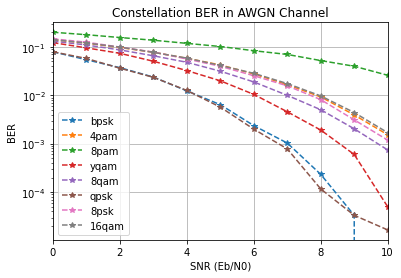

In [10]:
# Plots
for c in ber_data.keys():
    plt.semilogy(SNR, ber_data[c], '*--')
plt.legend(ber_data.keys())
plt.grid(True)
plt.xlim([0,10])
plt.xlabel("SNR (Eb/N0)")
plt.ylabel("BER")
plt.title("Constellation BER in AWGN Channel")
plt.show()